In [ ]:
#!pip install opendatasets --quiet

In [ ]:
#from google.colab import files
#from google.colab import drive

#files.upload()
#drive.mount('/content/drive')

In [ ]:
pip install folium

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium # интерактивные карты в Python

In [ ]:
#import opendatasets as od

#od.download("https://www.kaggle.com/competitions/classification-of-oil-and-gas-fields/data")

In [ ]:
#import shutil

# Путь к файлу на локальной машине (или Colab environment)
#local_file_path_train = '/content/classification-of-oil-and-gas-fields/train_oil.csv'
#local_file_path_test = '/content/classification-of-oil-and-gas-fields/oil_test.csv'

# Путь к директории на Google Диске
#google_drive_path_train = '/content/drive/MyDrive/ML_DZ3/train_oil.csv'
#google_drive_path_test = '/content/drive/MyDrive/ML_DZ3/oil_test.csv'

# Копируем файл на Google Диск
#shutil.copy(local_file_path_train, google_drive_path_train)
#shutil.copy(local_file_path_test, google_drive_path_test)

# 1. Анализ данных

In [ ]:
import pandas as pd

# Load the datasets
df = pd.read_csv(r"/content/drive/MyDrive/ML_DZ3/train_oil.csv")
df_test = pd.read_csv(r"/content/drive/MyDrive/oil_test_fixed.csv")

# Check if the column names match
column_match = df.columns.equals(df_test.columns)
column_match


False

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/ML_DZ3/train_oil.csv")
df_test= pd.read_csv(r"/content/drive/MyDrive/ML_DZ3/oil_test.csv")
df.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


Field name - название месторождения

Reservoir unit - юнит месторождения

Country - страна расположения

Region - регион расположения

Basin name - название бассейна

Tectonic regime - тектонический режим это совокупность геодинамических условий, которые определяют поведение земной коры в районе разработки месторождения

Latitude - широта

Longitude - долгота

Operator company - название компании

целевая переменная:

1 (ONSHORE) — Месторождение на суше.

0 (OFFSHORE) — Месторождение в море.

2 (ONSHORE-OFFSHORE) — Месторождение, которое имеет элементы обоих типов или расположено на границе между сушей и морем, либо может быть месторождением с использованием как суши, так и моря для добычи нефти.


Hydrocarbon type (main) - тип углеводорода

Reservoir status (current) - статус месторождения

Structural setting - структурные свойства

Depth (top reservoir ft TVD) - глубина

Reservoir period - литологический период

Lithology (main) - литология

Thickness (gross average ft) в контексте нефтяных скважин — это средняя толщина породы (или пласта) в футах, которая может содержать нефть, газ или воду.

Thickness (net pay average ft) - эффективная толщина

Porosity (Matrix Average): Пористость описывает объем пустых пространств (пор) в горной породе относительно общего объема породы.

Permeability (Air Average mD): Проницаемость — это способность породы пропускать жидкости через свои поры

In [ ]:
# Найдем уникальные колонки в каждом датафрейме
unique_in_df = df.columns.difference(df_test.columns)
unique_in_df_test = df_test.columns.difference(df.columns)

# Выведем их
print("Уникальные колонки в  train датасете:", unique_in_df)
print("Уникальные колонки во test датасете:", unique_in_df_test)


Уникальные колонки в  train датасете: Index(['Onshore/Offshore'], dtype='object')
Уникальные колонки во test датасете: Index([], dtype='object')


Вывод: в test датасете нет целевой переменной, т.е. ее нужно будет предсказать

- Проверим какие метки есть в test, но нет в train

In [ ]:
# Для каждой категориальной переменной в df и df_test
for col in df.select_dtypes(include=['object']).columns:
    if col in df_test.columns:  # Убедимся, что этот столбец присутствует и в df_test
        # Получаем уникальные метки для df и df_test
        df_unique = set(df[col].unique())  # Уникальные метки в df
        df_test_unique = set(df_test[col].unique())  # Уникальные метки в df_test

        # Находим метки, которые есть в df_test, но отсутствуют в df
        unseen_in_df = df_test_unique - df_unique

        if unseen_in_df:
            print(f"Для столбца '{col}' следующие метки присутствуют в df_test, но отсутствуют в df:")
            print(unseen_in_df)
        else:
            print(f"Для столбца '{col}' все метки из df_test присутствуют в df.")


Для столбца 'Field name' следующие метки присутствуют в df_test, но отсутствуют в df:
{'ARUN', 'XINGLONGTAI', 'PECOS SLOPE', 'RAMA', 'BALOL', 'ASHTART', 'WAFRA', 'WANGZHUANG', 'TAKULA', 'GORGON', 'MAYDAN MAHZAM', 'PRIRAZLOM', 'DINEH-BI-KEYAH', 'KF', 'KAYBOB', 'WANDOO', 'KG', 'LITTLE BOW', 'SNIPE LAKE', 'FUYU', 'BAIKOUQUAN', 'DAQING (LAMADIAN)', 'TANGENT', 'QATIF', 'VERMEJO-MOORE HOOPER', 'CHINGUETTI', 'DJEITUN', 'BRADFORD', 'NORTH HAYNESVILLE', 'GOLDEN SPIKE', 'LAMA', 'DUNE', 'VIRDEN', 'YOWLUMNE', 'MCELROY', 'KHALDA', 'SACHA', 'KARAZHANBAS', 'CARPINTERIA', 'FRANKLIN', 'MEDICINE RIVER', 'GULLFAKS', 'COTTONWOOD CREEK', 'BLACK LAKE', 'LIUBEI', 'NIAGARAN REEF TREND', 'WEIYUAN', 'CASPER CREEK SOUTH', 'HOADLEY', 'TIRRAWARRA', 'MANSURI', 'TUBRIDGI', 'PEACE RIVER', 'GAROUPA', 'KASIM', 'MATZEN', 'ERB WEST', 'SCHOONEBEEK-EMLICHHEIM', 'RONCADOR', 'YIHEZHUANG', 'SALT CREEK', 'OCTOBER', 'YAMBURG', 'LIUHUA 11-1', 'RAS BUDRAN', 'ROSEVEAR', 'CAVE GULCH', 'LISBON', 'CHENGDAO', 'UPPER VALLEY', 'WOLONGHE

Вывод:
- таких меток много
- LabelEncoding не подойдет при обучении модели, нужно использовать OneHotEncoding
- Для полей 'Field name', 'Reservoir unit' слишком много уникальных занчений (OneHotEncoding не подойдет для этих переменных) и много различных меток в train и test (LabelEncoding не подойдет). Можно попробовать хеш-функцию (HashingVectorizer) для кодирования этих полей

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

Вывод: значительное количество данных категориальные. Необходимо будет делать их кодирование

1. наличие дубликатов строк



In [ ]:
duplicate_rows = df.duplicated().sum()
print(f'Количество повторяющихся строк: {duplicate_rows}')

Количество повторяющихся строк: 0


2. количество пропусков в столбцах

In [ ]:
# Количество пропусков в каждом столбце
missing_values = df.isnull().sum()
a = list(missing_values[missing_values > 0])  # Создаем новый список
# Вывод только названий и количества пропусков
for column, count in missing_values.items():
  if count>0:
    print(f"В колонке {column}: {count} пропусков")

В колонке Country: 27 пропусков
В колонке Region: 38 пропусков
В колонке Basin name: 38 пропусков
В колонке Latitude: 27 пропусков
В колонке Longitude: 30 пропусков


3. Баланс классов (%)

In [ ]:
print(df["Onshore/Offshore"].value_counts(normalize=True) * 100)

Onshore/Offshore
ONSHORE             70.550162
OFFSHORE            27.831715
ONSHORE-OFFSHORE     1.618123
Name: proportion, dtype: float64


Вывод: классы разбалансированы. Нужно будет делать Oversampling

4. Уникальные значения категориальных данных

In [ ]:
df.select_dtypes(include=['object']).nunique()

,0
Field name,285
Reservoir unit,258
Country,42
Region,7
Basin name,93
Tectonic regime,55
Operator company,138
Onshore/Offshore,3
Hydrocarbon type,4
Reservoir status,13


Вывод: не для всех переменных можно будет сделать OneHotEncoding. Например, для

переменных Field name и Resevoir unit количество уникальных значений слишком большое. Для них нужно будет делать LabelEncoding

5. мин/макс/среднее для числовых значений

In [ ]:
print(df.describe().loc[['min', 'max', 'mean']])

      Latitude   Longitude         Depth  Thickness (gross average ft)  \
min  -38.39890 -151.615300    220.000000                     11.000000   
max   76.44620  148.417000  19888.000000                   8200.000000   
mean  35.62426  -12.508435   6755.669903                    760.087379   

      Thickness (net pay average ft)   Porosity  Permeability  
min                         2.120000   1.100000      0.010000  
max                      2976.000000  35.000000   7500.000000  
mean                      183.683236  17.825178    476.994757  


Вывод:

- значения Latitude/ Longitude логичны
- значения Depth / Thickness нужно проверять на наличие выбросов , т.к. макимальные начения сильно отличаются от средних

6. Корреляционный анализ числовых признаков

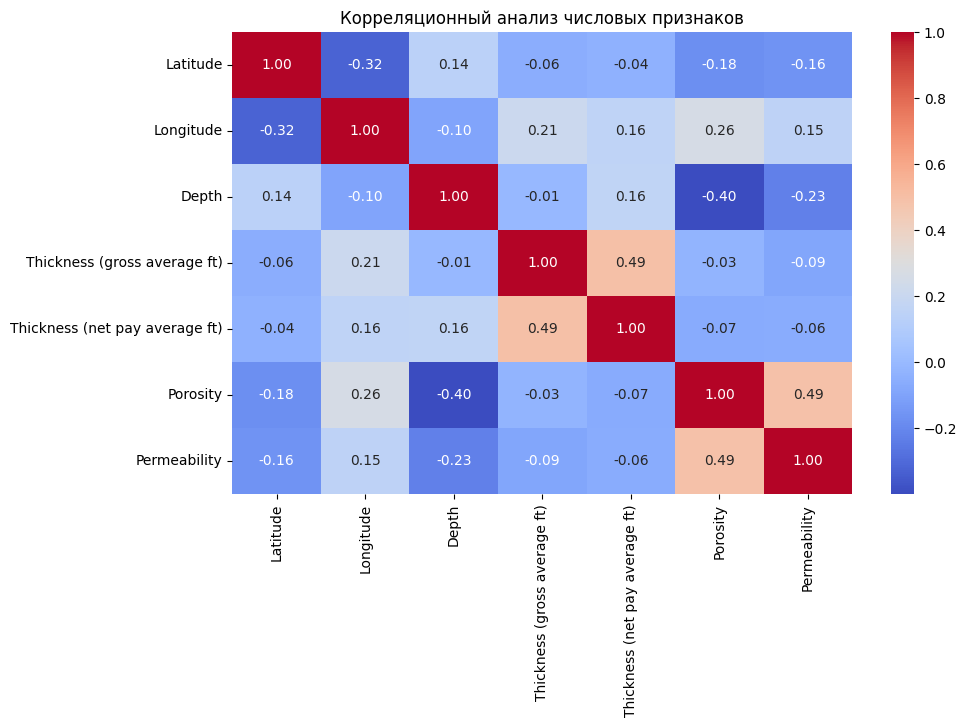

In [ ]:
# Выбираем только числовые признаки
numeric_df = df.select_dtypes(include=['number'])

# Строим корреляционную матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционный анализ числовых признаков")
plt.show()


Вывод:
- корреляция  0,49 между Thickness Gross/Net логична
- корреляция -0,32 между Longitude / Latitude говорит о том что местораждения находяться в кластерах.

Если бы месторождения располагались равномерно, корреляция между долготой и широтой могла бы быть близкой к нулю,

- корреляция 0.49 между Permiability/ Porosity

Porosity (Matrix Average): Пористость описывает объем пустых пространств (пор) в горной породе относительно общего объема породы.

Permeability (Air Average mD): Проницаемость — это способность породы пропускать жидкости через свои поры

корреляция 0.49 логична. Такая корреляция указывает на умеренную положительную связь между этими двумя параметрами, что означает, что, в целом, с увеличением пористости проницаемость также может увеличиваться, но эта зависимость не является жесткой.


- других значительных корреляций не видно

6. Проверяем  Depth / Thickness на выбросы

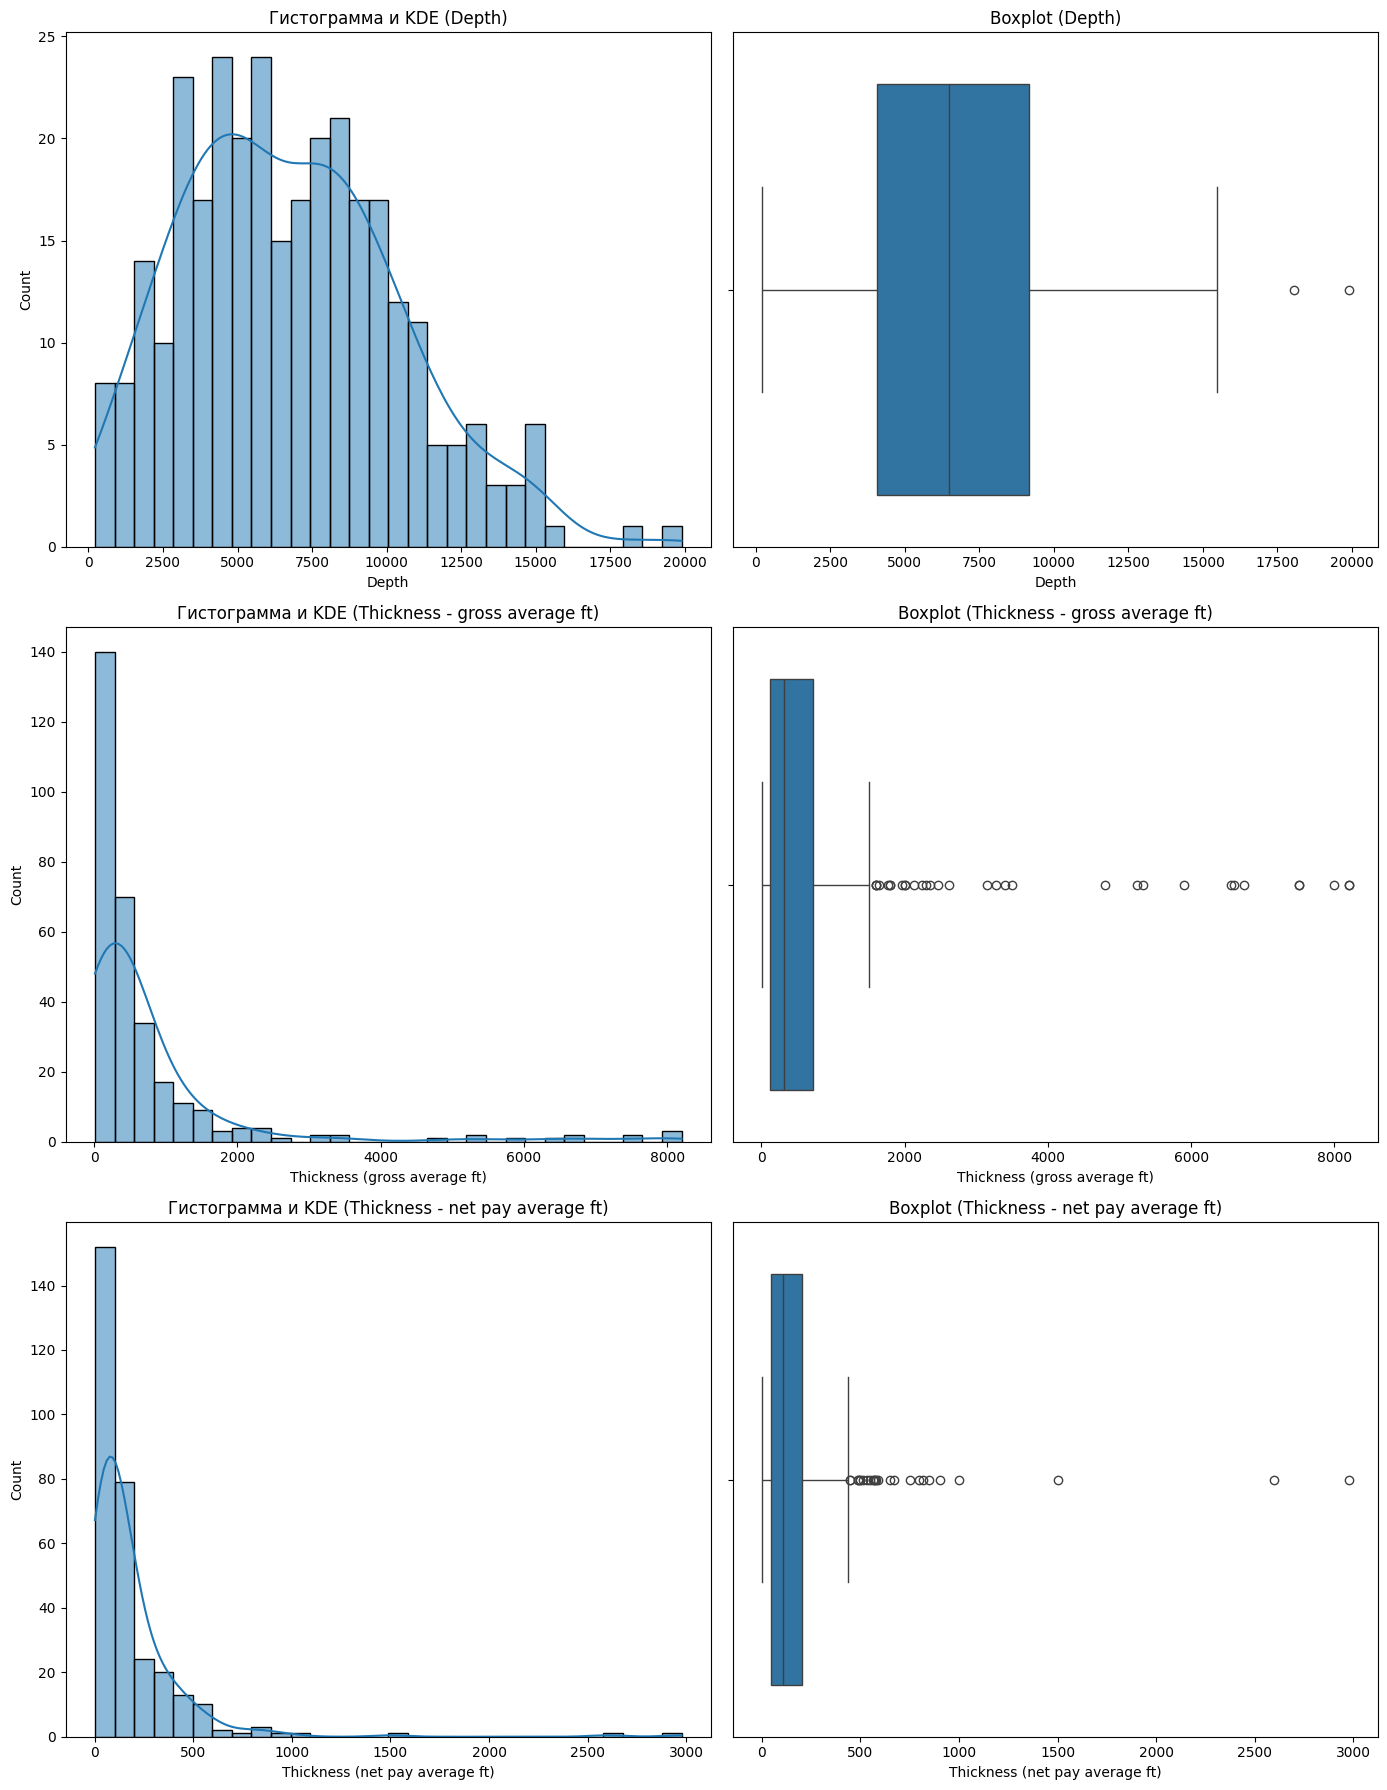

In [ ]:
# Создаем подграфики: 3 строки, 2 столбца
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Гистограмма и KDE для Depth
sns.histplot(df['Depth'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Гистограмма и KDE (Depth)')

# Boxplot для Depth
sns.boxplot(x=df['Depth'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot (Depth)')

# Гистограмма и KDE для Thickness (gross average ft)
sns.histplot(df['Thickness (gross average ft)'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Гистограмма и KDE (Thickness - gross average ft)')

# Boxplot для Thickness (gross average ft)
sns.boxplot(x=df['Thickness (gross average ft)'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot (Thickness - gross average ft)')

# Гистограмма и KDE для Thickness (net pay average ft)
sns.histplot(df['Thickness (net pay average ft)'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Гистограмма и KDE (Thickness - net pay average ft)')

# Boxplot для Thickness (net pay average ft)
sns.boxplot(x=df['Thickness (net pay average ft)'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot (Thickness - net pay average ft)')

plt.tight_layout()  # Чтобы графики не накладывались
plt.show()


In [ ]:
# Фильтруем строки, где Depth > 16000
high_depths = df[df['Depth'] > 16000]

# Выводим номера строк и соответствующие значения Latitude, Longitude, Country
print("Строки с Depth > 16000:")
print(high_depths[['Latitude', 'Longitude', 'Country']])

Строки с Depth > 16000:
     Latitude  Longitude Country
224   35.3676  -100.0793     USA
272   30.8976   -88.0660     USA


Координаты указанных строк с глубиной более 16 000 футов соответствуют следующим местоположениям в США:

1) **Строка с индексом 224**:
   - **Координаты**: 35.3676° северной широты, -100.0793° западной долготы
   - **Местоположение**: Около города Пампа, штат Техас
   - **Описание**: Пампа — город в округе Грей, известен своей историей в нефтяной промышленности.

2) **Строка с индексом 272**:
   - **Координаты**: 30.8976° северной широты, -88.0660° западной долготы
   - **Местоположение**: Район к северо-западу от города Мобил, штат Алабама
   - **Описание**: Мобил — портовый город на побережье Мексиканского залива, с развитой нефтехимической промышленностью.

Оба местоположения находятся в регионах с активной нефтедобычей, что объясняет наличие глубоких скважин.

Выбрасы обоснованы и возможны. Корректировать данный выброс не нужно.



7. выбросы в Thickness Gross/Net nоже геологически обоснованы для В глубоководных и шельфовых месторождениях. Необходимо проверить какая глубина скважин с такими выбросами и где они расположены

In [ ]:
# Фильтрация строк, где толщина больше 2000
filtered_df = df[df['Thickness (gross average ft)'] > 2000]

# Вывод нужных колонок вместе с индексом строки
print(filtered_df[['Field name', 'Country', 'Depth', 'Thickness (gross average ft)']].reset_index())


    index         Field name       Country  Depth  \
0       1        LAGOA PARDA        BRAZIL   4843   
1      20            BONGKOT      THAILAND   3020   
2      23            VENTURE        CANADA  14231   
3      33           GASIKULE           NaN   4199   
4      50        PALM VALLEY           NaN   5656   
5      97        DZHIGALYBEG  TURKMENISTAN  10100   
6      99       KARACHAGANAK    KAZAKHSTAN  11870   
7     112        WENMINGZHAI         CHINA   4462   
8     117            KOROLEV    KAZAKHSTAN  12746   
9     122          WANGCHANG         CHINA   2421   
10    128          GOTURDEPE  TURKMENISTAN   5200   
11    134           CHELEKEN  TURKMENISTAN   1800   
12    147           WATERTON        CANADA   8100   
13    165            VAREGAN        RUSSIA   5577   
14    207          YANGSANMU         CHINA   3898   
15    241           NATUNA L     INDONESIA   8218   
16    249          WILBURTON           USA  12860   
17    288           SAMARANG      MALAYSIA   1

8. есть ли строки где Thickness (gross average ft) < Thickness (net pay average ft)

In [ ]:
# Фильтруем строки, где 'Thickness (gross average ft)' < 'Thickness (net pay average ft)'
invalid_rows = df[df['Thickness (gross average ft)'] < df['Thickness (net pay average ft)']]

# Проверяем, есть ли такие строки
if not invalid_rows.empty:
    print("Найдены строки, где 'Thickness (gross average ft)' < 'Thickness (net pay average ft)':")
    print(invalid_rows[['Thickness (gross average ft)', 'Thickness (net pay average ft)']].reset_index())
else:
    print("Таких строк нет.")


Найдены строки, где 'Thickness (gross average ft)' < 'Thickness (net pay average ft)':
   index  Thickness (gross average ft)  Thickness (net pay average ft)
0    124                          11.0                            12.0


In [ ]:
# Фильтруем строки, где 'Thickness (gross average ft)' < 'Thickness (net pay average ft)'
invalid_rows = df_test[df_test['Thickness (gross average ft)'] < df_test['Thickness (net pay average ft)']]

# Проверяем, есть ли такие строки
if not invalid_rows.empty:
    print("Найдены строки, где 'Thickness (gross average ft)' < 'Thickness (net pay average ft)':")
    print(invalid_rows[['Thickness (gross average ft)', 'Thickness (net pay average ft)']].reset_index())
else:
    print("Таких строк нет.")


Найдены строки, где 'Thickness (gross average ft)' < 'Thickness (net pay average ft)':
   index  Thickness (gross average ft)  Thickness (net pay average ft)
0     74                         820.0                           928.0
1     96                         500.0                           520.0


9. Смотрим нет ли скважин там где их не может быть: океаны, горы

При наведении курсора на значек выводиться номер строки, глубина скважины, Onshore/Offshore

In [ ]:
print(df['Onshore/Offshore'].unique())

['ONSHORE' 'OFFSHORE' 'ONSHORE-OFFSHORE']


- Визуально смотрим нет ли на суше значений offshore и наоборот

In [ ]:
#pip install geopy pycountry-convert --quiet

In [ ]:
import folium

# Создание карты с центром в среднем значении широты и долготы
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2)

# Цвета для категорий
color_map = {
    "onshore": "blue",
    "offshore": "red"
}

# Добавляем маркеры
for index, row in df.iterrows():
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):  # Проверка на NaN
        category = str(row['Onshore/Offshore']).strip().lower()  # Приводим к единому формату
        color = color_map.get(category, "green")  # Если не Onshore/Offshore, ставим зелёный

        popup_content = f"Row: {index}<br>Depth: {row['Depth']}<br>Onshore/Offshore: {row['Onshore/Offshore']}"
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=popup_content,
            icon=folium.Icon(color=color)
        ).add_to(m)

# Сохраняем карту в HTML
m.save("map.html")

# Отображение карты в Jupyter
m


Можно выполнить поиск скважин, находящихся внутри заданных прямоугольных областей (или прямоугольных регионов), определяя их через координаты углов.

Например:
- Гренадыйская впадина
Широта: 11°00′N — 13°30′N
Долгота: 59°00′W — 63°00′W
- Гольфстрим
Широта: около 30°N — 35°N
Долгота: около 70°W — 75°W
Широта: около 40°N — 45°N
Долгота: около 50°W — 55°W
- Тебет
Широта: 26°N — 37°N
Долгота: 78°E — 95°E

In [ ]:
# Фильтрация по нескольким диапазонам координат, включая Тибет
df_filtered = df[((df['Latitude'] >= 11.0) & (df['Latitude'] <= 13.5) &
                  (df['Longitude'] >= -63.0) & (df['Longitude'] <= -59.0)) |
                 ((df['Latitude'] >= 30.0) & (df['Latitude'] <= 35.0) &
                  (df['Longitude'] >= -75.0) & (df['Longitude'] <= -70.0)) |
                 ((df['Latitude'] >= 40.0) & (df['Latitude'] <= 45.0) &
                  (df['Longitude'] >= -55.0) & (df['Longitude'] <= -50.0)) |
                 ((df['Latitude'] >= 26.0) & (df['Latitude'] <= 37.0) &
                  (df['Longitude'] >= 78.0) & (df['Longitude'] <= 95.0))]

# Просмотр отфильтрованных данных
print("Найдено строк: ", len(df_filtered))



Найдено строк:  0


# 2. Feature Engineering - Восстановим данные которые возможно

1. Востановим Region (где возможно)

- Связь Region/Country

In [ ]:
# Группируем по столбцу 'Country' и для каждой страны выводим уникальные значения в столбце 'Region'
country_region = df.groupby('Country')['Region'].unique()

# Выводим результат
print(country_region)

Country
AFGHANISTAN                            [FAR EAST]
ALGERIA                                  [AFRICA]
ANGOLA                                   [AFRICA]
AUSTRALIA                         [nan, FAR EAST]
BRAZIL                            [LATIN AMERICA]
CANADA                            [NORTH AMERICA]
CHINA                             [FAR EAST, nan]
COLOMBIA                          [LATIN AMERICA]
DENMARK                                  [EUROPE]
EGYPT                                    [AFRICA]
EQUATORIAL GUINEA                        [AFRICA]
FRANCE                                   [EUROPE]
GABON                                    [AFRICA]
INDIA                             [nan, FAR EAST]
INDONESIA                         [FAR EAST, nan]
IRAN                                [MIDDLE EAST]
IRAQ                                [MIDDLE EAST]
KAZAKHSTAN                  [FORMER SOVIET UNION]
LIBYA                                    [AFRICA]
MALAYSIA                               [FA

In [ ]:
# Группируем по столбцу 'Country' и для каждой страны выводим уникальные значения в столбце 'Region'
country_region = df_test.groupby('Country')['Region'].unique()

# Выводим результат
print(country_region)

Country
ANGOLA                                    [AFRICA]
AUSTRALIA                               [FAR EAST]
AUSTRIA                                   [EUROPE]
BAHRAIN                              [MIDDLE EAST]
BRAZIL                             [LATIN AMERICA]
CANADA                             [NORTH AMERICA]
CHINA                              [FAR EAST, nan]
DENMARK                                   [EUROPE]
ECUADOR                            [LATIN AMERICA]
EGYPT                                     [AFRICA]
FRANCE                                    [EUROPE]
INDIA                                   [FAR EAST]
INDONESIA                               [FAR EAST]
IRAN                                 [MIDDLE EAST]
KAZAKHSTAN                   [FORMER SOVIET UNION]
KUWAIT                               [MIDDLE EAST]
MALAYSIA                                [FAR EAST]
MAURITANIA                                [AFRICA]
NETHERLANDS /GERMANY                      [EUROPE]
NEUTRAL ZONE           

- Проверим есть ли строки где пропущены Region, но не пропущен Country

In [ ]:
# Фильтрация строк, где пропущено значение в 'Region', но не в 'Country'
missing_region = df[df['Region'].isnull() & df['Country'].notnull()]

# Выводим количество таких строк
print("Количество строк с пропущенным значением в 'Region', но не в 'Country':", missing_region.shape[0])

# Выводим строки
print(missing_region['Country'])


Количество строк с пропущенным значением в 'Region', но не в 'Country': 11
16         INDIA
21     AUSTRALIA
40           USA
66            UK
82        RUSSIA
107        CHINA
143          USA
214          USA
226    INDONESIA
229       RUSSIA
230           UK
Name: Country, dtype: object


- Видно, что пропуски в Region можно востановить

In [ ]:
# Словарь для замены пропусков
region_dict = {
    "AFGHANISTAN": "FAR EAST",
    "ALGERIA": "AFRICA",
    "ANGOLA": "AFRICA",
    "AUSTRALIA": "FAR EAST",
    "BRAZIL": "LATIN AMERICA",
    "CANADA": "NORTH AMERICA",
    "CHINA": "FAR EAST",
    "COLOMBIA": "LATIN AMERICA",
    "DENMARK": "EUROPE",
    "EGYPT": "AFRICA",
    "EQUATORIAL GUINEA": "AFRICA",
    "FRANCE": "EUROPE",
    "GABON": "AFRICA",
    "INDIA": "FAR EAST",
    "INDONESIA": "FAR EAST",
    "IRAN": "MIDDLE EAST",
    "IRAQ": "MIDDLE EAST",
    "KAZAKHSTAN": "FORMER SOVIET UNION",
    "LIBYA": "AFRICA",
    "MALAYSIA": "FAR EAST",
    "NEUTRAL ZONE": "MIDDLE EAST",
    "NIGERIA": "AFRICA",
    "NORWAY": "EUROPE",
    "NORWAY /UK": "EUROPE",
    "OMAN": "MIDDLE EAST",
    "PAPUA NEW GUINEA": "FAR EAST",
    "QATAR": "MIDDLE EAST",
    "RUSSIA": "FORMER SOVIET UNION",
    "SAUDI ARABIA": "MIDDLE EAST",
    "SOUTH AFRICA": "AFRICA",
    "THAILAND": "FAR EAST",
    "TRINIDAD AND TOBAGO": "LATIN AMERICA",
    "TUNISIA": "AFRICA",
    "TUNISIA /ALGERIA": "AFRICA",
    "TURKEY": "MIDDLE EAST",
    "TURKMENISTAN": "FORMER SOVIET UNION",
    "UAE": "MIDDLE EAST",
    "UK": "EUROPE",
    "UK /NORWAY": "EUROPE",
    "USA": "NORTH AMERICA",
    "UZBEKISTAN": "FORMER SOVIET UNION",
    "VENEZUELA": "LATIN AMERICA"
}

# Функция для замены пропусков в 'Region'
def replace_region(row):
    if pd.isnull(row['Region']):
        return region_dict.get(row['Country'], row['Region'])
    return row['Region']

# Применяем функцию к DataFrame
df['Region'] = df.apply(replace_region, axis=1)

# Фильтрация строк, где пропущено значение в 'Region', но не в 'Country'
missing_region = df[df['Region'].isnull() & df['Country'].notnull()]

# Выводим количество таких строк
print("Количество строк с пропущенным значением в 'Region', но не в 'Country':", missing_region.shape[0])

# Выводим строки
print(missing_region['Country'])

Количество строк с пропущенным значением в 'Region', но не в 'Country': 0
Series([], Name: Country, dtype: object)


2. Восстановим Basin name (где возможно)

- Связь Country/Basinname

In [ ]:
# Группируем по столбцу 'Country' и для каждой страны выводим уникальные значения в столбце 'Region'
country_region = df.groupby('Basin name')['Country'].unique()

# Выводим результат
print(country_region)

Basin name
ABU GHARADIG                                          [EGYPT]
AMU DARYA             [UZBEKISTAN, TURKMENISTAN, AFGHANISTAN]
ANADARKO                                                [USA]
APPALACHIAN                                             [USA]
AQUITAINE                                            [FRANCE]
                                       ...                   
WESTERN CANADA                                       [CANADA]
WESTERN OVERTHRUST                                      [USA]
WILLISTON                                       [USA, CANADA]
YINGGEHAI                                             [CHINA]
ZAGROS                                           [IRAN, IRAQ]
Name: Country, Length: 93, dtype: object


- Проверим есть ли строки с пропусками в Basin name, но без пропуска в Country  

In [ ]:
# Фильтрация строк с пропущенным значением в 'Basin name' и ненулевым значением в 'Country'
missing_basin = df[df['Basin name'].isnull() & df['Country'].notnull()]

# Выводим количество таких строк
print(f"Количество строк с пропущенным 'Basin name' и ненулевым 'Country': {missing_basin.shape[0]}")

# Данные о бассейнах для каждой страны
basin_info = {
    "AFGHANISTAN": "FAR EAST",
    "ALGERIA": "AFRICA",
    "ANGOLA": "AFRICA",
    "AUSTRALIA": "FAR EAST",
    "BRAZIL": "LATIN AMERICA",
    "CANADA": "NORTH AMERICA",
    "CHINA": "FAR EAST",
    "COLOMBIA": "LATIN AMERICA",
    "DENMARK": "EUROPE",
    "EGYPT": "AFRICA",
    "EQUATORIAL GUINEA": "AFRICA",
    "FRANCE": "EUROPE",
    "GABON": "AFRICA",
    "INDIA": "FAR EAST",
    "INDONESIA": "FAR EAST",
    "IRAN": "MIDDLE EAST",
    "IRAQ": "MIDDLE EAST",
    "KAZAKHSTAN": "FORMER SOVIET UNION",
    "LIBYA": "AFRICA",
    "MALAYSIA": "FAR EAST",
    "NEUTRAL ZONE": "MIDDLE EAST",
    "NIGERIA": "AFRICA",
    "NORWAY": "EUROPE",
    "OMAN": "MIDDLE EAST",
    "PAPUA NEW GUINEA": "FAR EAST",
    "QATAR": "MIDDLE EAST",
    "RUSSIA": "FORMER SOVIET UNION",
    "SAUDI ARABIA": "MIDDLE EAST",
    "SOUTH AFRICA": "AFRICA",
    "THAILAND": "FAR EAST",
    "TRINIDAD AND TOBAGO": "LATIN AMERICA",
    "TUNISIA": "AFRICA",
    "TURKEY": "MIDDLE EAST",
    "TURKMENISTAN": "FORMER SOVIET UNION",
    "UAE": "MIDDLE EAST",
    "UK": "EUROPE",
    "USA": "NORTH AMERICA",
    "UZBEKISTAN": "FORMER SOVIET UNION",
    "VENEZUELA": "LATIN AMERICA"
}

# Выводим индексы строк, названия стран и предполагаемые бассейны
for idx, country in missing_basin['Country'].items():
    # Ищем информацию о бассейне по стране
    basin = basin_info.get(country, "Информация о бассейне не найдена")
    print(f"Строка {idx}: {country} - Соответствующий бассейн: {basin}")


Количество строк с пропущенным 'Basin name' и ненулевым 'Country': 11
Строка 16: INDIA - Соответствующий бассейн: FAR EAST
Строка 21: AUSTRALIA - Соответствующий бассейн: FAR EAST
Строка 40: USA - Соответствующий бассейн: NORTH AMERICA
Строка 66: UK - Соответствующий бассейн: EUROPE
Строка 82: RUSSIA - Соответствующий бассейн: FORMER SOVIET UNION
Строка 107: CHINA - Соответствующий бассейн: FAR EAST
Строка 143: USA - Соответствующий бассейн: NORTH AMERICA
Строка 214: USA - Соответствующий бассейн: NORTH AMERICA
Строка 226: INDONESIA - Соответствующий бассейн: FAR EAST
Строка 229: RUSSIA - Соответствующий бассейн: FORMER SOVIET UNION
Строка 230: UK - Соответствующий бассейн: EUROPE


- Восстановим пропуски в Basin name

In [ ]:
# Восстанавливаем пропуски в 'Basin name' по словарю basin_info
df['Basin name'] = df.apply(
    lambda row: basin_info.get(row['Country'], row['Basin name']) if pd.isnull(row['Basin name']) else row['Basin name'],
    axis=1
)

# Восстанавливаем пропуски в 'Basin name' по словарю basin_info
df_test['Basin name'] = df_test.apply(
    lambda row: basin_info.get(row['Country'], row['Basin name']) if pd.isnull(row['Basin name']) else row['Basin name'],
    axis=1
)
# Проверяем, что пропуски были восстановлены
print(f"Train: Количество пропусков в 'Basin name' после восстановления: {df['Basin name'].isnull().sum()}")

# Проверяем, что пропуски были восстановлены
print(f"Test: Количество пропусков в 'Basin name' после восстановления: {df_test['Basin name'].isnull().sum()}")


Train: Количество пропусков в 'Basin name' после восстановления: 27
Test: Количество пропусков в 'Basin name' после восстановления: 8


3. Восстановим Longitude (где возможно)

In [ ]:
# Получаем уникальные значения Latitude, для которых нет Longitude
latitude_without_longitude = df[df['Latitude'].notnull() & df['Longitude'].isnull()]['Latitude'].unique()

# Ищем строки с такими же значениями Latitude и выводим индексы, включая информацию о Country
for lat in latitude_without_longitude:
    matching_rows = df[df['Latitude'] == lat]
    for idx, row in matching_rows.iterrows():
        print(f"Train: Строка {idx}: Latitude = {row['Latitude']}, Longitude = {row['Longitude']}, Country = {row['Country']}")


Train: Строка 130: Latitude = 31.39, Longitude = nan, Country = ALGERIA
Train: Строка 160: Latitude = 29.783, Longitude = nan, Country = EGYPT
Train: Строка 232: Latitude = 53.6204, Longitude = nan, Country = UK


In [ ]:
# Получаем уникальные значения Latitude, для которых нет Longitude
latitude_without_longitude = df_test[df_test['Latitude'].notnull() & df_test['Longitude'].isnull()]['Latitude'].unique()

# Ищем строки с такими же значениями Latitude и выводим индексы, включая информацию о Country
for lat in latitude_without_longitude:
    matching_rows = df_test[df_test['Latitude'] == lat]
    for idx, row in matching_rows.iterrows():
        print(f"Test: Строка {idx}: Latitude = {row['Latitude']}, Longitude = {row['Longitude']}, Country = {row['Country']}")


Test: Строка 27: Latitude = 33.0456, Longitude = nan, Country = USA
Test: Строка 35: Latitude = 39.58, Longitude = nan, Country = TURKMENISTAN
Test: Строка 71: Latitude = 20.8219, Longitude = nan, Country = CHINA


In [ ]:
# Список стран, для которых нужно вывести строки
countries_to_check = ['ALGERIA', 'EGYPT', 'UK']

# Фильтруем строки с соответствующими странами и выводим только Latitude, Longitude и Country
for country in countries_to_check:
    matching_rows = df[df['Country'] == country]
    for idx, row in matching_rows.iterrows():
        print(f"Train: Строка {idx}: Latitude = {row['Latitude']}, Longitude = {row['Longitude']}, Country = {row['Country']}")


Train: Строка 130: Latitude = 31.39, Longitude = nan, Country = ALGERIA
Train: Строка 114: Latitude = 29.841, Longitude = 27.915, Country = EGYPT
Train: Строка 160: Latitude = 29.783, Longitude = nan, Country = EGYPT
Train: Строка 193: Latitude = 31.4382, Longitude = 31.3616, Country = EGYPT
Train: Строка 254: Latitude = 29.8589, Longitude = 28.5229, Country = EGYPT
Train: Строка 255: Latitude = 31.84, Longitude = 32.145, Country = EGYPT
Train: Строка 293: Latitude = 28.2919, Longitude = 33.3144, Country = EGYPT
Train: Строка 297: Latitude = 28.2349, Longitude = 33.4649, Country = EGYPT
Train: Строка 14: Latitude = 56.1648, Longitude = 3.0593, Country = UK
Train: Строка 19: Latitude = 56.45, Longitude = 2.2833, Country = UK
Train: Строка 54: Latitude = 57.0556, Longitude = 2.0694, Country = UK
Train: Строка 64: Latitude = 50.6672, Longitude = -2.0278, Country = UK
Train: Строка 66: Latitude = 53.3932, Longitude = 2.5239, Country = UK
Train: Строка 74: Latitude = 57.0556, Longitude = 2.

In [ ]:
# Список стран, для которых нужно вывести строки
countries_to_check = ['USA', 'TURKMENISTAN', 'CHINA']

# Фильтруем строки с соответствующими странами и выводим только Latitude, Longitude и Country
for country in countries_to_check:
    matching_rows = df_test[df_test['Country'] == country]
    for idx, row in matching_rows.iterrows():
        print(f"Test: Строка {idx}: Latitude = {row['Latitude']}, Longitude = {row['Longitude']}, Country = {row['Country']}")


Test: Строка 15: Latitude = 31.9486, Longitude = -92.932, Country = USA
Test: Строка 16: Latitude = 26.57, Longitude = -99.15, Country = USA
Test: Строка 17: Latitude = 36.27244, Longitude = -100.33188, Country = USA
Test: Строка 19: Latitude = 39.9739, Longitude = -101.1508, Country = USA
Test: Строка 21: Latitude = 34.3408, Longitude = -119.5309, Country = USA
Test: Строка 22: Latitude = 42.64, Longitude = -106.84, Country = USA
Test: Строка 23: Latitude = 42.98, Longitude = -106.87, Country = USA
Test: Строка 27: Latitude = 33.0456, Longitude = nan, Country = USA
Test: Строка 30: Latitude = 44.039, Longitude = -107.748, Country = USA
Test: Строка 32: Latitude = 43.2827, Longitude = -84.8716, Country = USA
Test: Строка 34: Latitude = 36.4773, Longitude = -109.1404, Country = USA
Test: Строка 38: Latitude = 31.5521, Longitude = -102.4349, Country = USA
Test: Строка 44: Latitude = 27.7656, Longitude = -90.72, Country = USA
Test: Строка 54: Latitude = 33.6998, Longitude = -118.0335, Cou

In [ ]:
# Обновляем значения Longitude для конкретных строк
df_test.loc[27, 'Longitude'] = -92.932  # Обновляем строку 27 Longitude = -92.932 USA
df_test.loc[35, 'Longitude'] = 61.1  # Обновляем строку 35 Longitude = 61.1, Country = TURKMENISTAN
df_test.loc[71, 'Longitude'] = 107.2948  # Обновляем строку 71 Longitude = 107.2948, Country = CHINA

Строка 130: Latitude = 31.39, Longitude = nan, Country = ALGERI - по карте это примерно Longitude = 0

Строка 160: Latitude = 29.783, Longitude = nan, Country = EGYPT берем значение из строки 114: Latitude = 29.841, Longitude = 27.915, Country = EGYPT

Строка 232: Latitude = 53.6204, Longitude = nan, Country = UK берем из строки 121: Latitude = 61.1, Longitude = 1.3167, Country = UK

In [ ]:
# Обновляем значения Longitude для конкретных строк
df.loc[130, 'Longitude'] = 0.0  # Обновляем строку 160
df.loc[160, 'Longitude'] = 27.915  # Обновляем строку 160
df.loc[232, 'Longitude'] = 1.7338  # Обновляем строку 232

4. Итого пропущенных данных после частичного востановления

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
#print("Количество пропусков в каждом столбце:")
#print(missing_values)

# Преобразуем старый список 'a' в словарь для удобства сравнения
a_dict = dict(zip(missing_values.index, a))

# Сравниваем старые и новые значения пропусков
for column in missing_values.index:
    if column in a_dict:
        if a_dict[column] != missing_values[column]:
            print(f"Количество пропусков в столбце '{column}' изменилось: было {a_dict[column]}, стало {missing_values[column]}")
        else:
            print(f"Количество пропусков в столбце '{column}' не изменилось: {a_dict[column]}")
    else:
        print(f"Новый столбец с пропусками: {column} - {missing_values[column]}")


Количество пропусков в столбце 'Country' не изменилось: 27
Количество пропусков в столбце 'Region' изменилось: было 38, стало 27
Количество пропусков в столбце 'Basin name' изменилось: было 38, стало 27
Количество пропусков в столбце 'Latitude' не изменилось: 27
Количество пропусков в столбце 'Longitude' изменилось: было 30, стало 27


In [ ]:
missing_values = df_test.isnull().sum()
missing_values = missing_values[missing_values > 0]
#print("Количество пропусков в каждом столбце:")
#print(missing_values)

# Преобразуем старый список 'a' в словарь для удобства сравнения
a_dict = dict(zip(missing_values.index, a))

# Сравниваем старые и новые значения пропусков
for column in missing_values.index:
    if column in a_dict:
        if a_dict[column] != missing_values[column]:
            print(f"Количество пропусков в столбце '{column}' изменилось: было {a_dict[column]}, стало {missing_values[column]}")
        else:
            print(f"Количество пропусков в столбце '{column}' не изменилось: {a_dict[column]}")
    else:
        print(f"Новый столбец с пропусками: {column} - {missing_values[column]}")

Количество пропусков в столбце 'Country' изменилось: было 27, стало 13
Количество пропусков в столбце 'Region' изменилось: было 38, стало 16
Количество пропусков в столбце 'Basin name' изменилось: было 38, стало 8
Количество пропусков в столбце 'Latitude' изменилось: было 27, стало 13
Количество пропусков в столбце 'Longitude' изменилось: было 30, стало 13


In [ ]:
# Фильтруем строки, где отсутствуют все указанные значения
missing_all_values = df[df[['Country', 'Region', 'Basin name', 'Latitude', 'Longitude']].isnull().all(axis=1)]

# Получаем количество таких строк
print(f"Количество строк, в которых отсутствуют 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude': {missing_all_values.shape[0]}")


Количество строк, в которых отсутствуют 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude': 27


In [ ]:
# Фильтруем строки, где отсутствуют все указанные значения
missing_all_values = df_test[df_test[['Country', 'Region', 'Basin name', 'Latitude', 'Longitude']].isnull().all(axis=1)]

# Получаем количество таких строк
print(f"Количество строк, в которых отсутствуют 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude': {missing_all_values.shape[0]}")


Количество строк, в которых отсутствуют 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude': 8


5. Во всех строках где есть пропущенные значения отсутствует информацио о местоположении скважины, остальная информация присутствует.

Так как геграфические координаты скважины являются значимой переменной ( оказывает существенное влияние на целевую переменную), то лучше не создавать синтетические данные по географическим координатам ( т.е. удалить строки с пропущенными координатами которые не удалось восстановить)

Но можно попробовать два варианта ( в зависимости от значения переменной del_choice):
- del_choice = 0:

удаляем строки где отсутсвуют 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude'

В этом случае увеличивается значимость технических признаков
-  del_choice = 1:

Восстанавливаем значения  'Country', 'Region', 'Basin name' по значению Field name

A для  'Latitude', 'Longitude' создаем одну синтетическую точку максимально удаленную от всех остальных координат


В этом случае увеличивается значимость географических признаком

И посмотреть какой метод дает улучшение метрик на тестовых данных

- Создадим словарь где каждому  Field name (ключ) поставить значения Country, Region, Basin name

In [ ]:
# Создаем словарь, группируя данные по 'Field name'
field_dict = df.groupby('Field name')[['Country', 'Region', 'Basin name']].first().to_dict(orient='index')

# Выведем несколько примеров
for key, value in list(field_dict.items())[:5]:  # Выведем первые 5 записей для примера
    print(f"{key}: {value}")


ABQAIQ: {'Country': 'SAUDI ARABIA', 'Region': 'MIDDLE EAST', 'Basin name': 'THE GULF'}
ABU MADI-EL QARA: {'Country': 'EGYPT', 'Region': 'AFRICA', 'Basin name': 'NILE DELTA'}
AL HUWAISAH: {'Country': 'OMAN', 'Region': 'MIDDLE EAST', 'Basin name': 'FAHUD SALT'}
ALABAMA FERRY: {'Country': 'USA', 'Region': 'NORTH AMERICA', 'Basin name': 'GULF OF MEXICO NORTHERN ONSHORE'}
ALIBEKMOLA: {'Country': 'KAZAKHSTAN', 'Region': 'FORMER SOVIET UNION', 'Basin name': 'CASPIAN NORTH'}


- Пробуем восстановить значения 'Country', 'Region', 'Basin name' по значению Field name

In [ ]:
# Копируем DataFrame для отслеживания изменений
df_original = df.copy()

# Функция для восстановления значений из field_dict
def restore_value(row, col_name, field_dict):
    if pd.isna(row[col_name]):  # Если пропуск
        field_name = row["Field name"]
        if field_name in field_dict:
            return field_dict[field_name].get(col_name, "unknown")  # Получаем значение из словаря
        else:
            return "unknown"
    return row[col_name]

# Применяем восстановление значений
for col in ["Country", "Region", "Basin name"]:
    df[col] = df.apply(lambda row: restore_value(row, col, field_dict), axis=1)

# Заполняем пропущенные координаты "unknown"
#df["Latitude"] = df["Latitude"].apply(lambda x: -90 if pd.isna(x) else x)
#df["Longitude"] = df["Longitude"].apply(lambda x: 0 if pd.isna(x) else x)

# Определяем строки, которые были восстановлены
recovered_rows = df[(df["Country"] != df_original["Country"]) |
                    (df["Region"] != df_original["Region"]) |
                    (df["Basin name"] != df_original["Basin name"])]

# Вывод номеров строк и восстановленных значений
print(recovered_rows.reset_index()[["index", "Field name", "Country", "Region", "Basin name"]])


    index        Field name    Country         Region         Basin name
0      11     BADR EL DIN-2       None           None               None
1      12      BRIDGER LAKE       None           None               None
2      15             SCOTT       None           None               None
3      28             ZAKUM        UAE    MIDDLE EAST       RUB AL KHALI
4      33          GASIKULE      CHINA       FAR EAST           FAR EAST
5      35              UZEN       None           None               None
6      37               ULA       None           None               None
7      49             YIBAL       OMAN    MIDDLE EAST         FAHUD SALT
8      50       PALM VALLEY       None           None               None
9      55           WUBAITI       None           None               None
10     79           OROCUAL  VENEZUELA  LATIN AMERICA  EASTERN VENEZUELA
11     80          GLENBURN       None           None               None
12     89  HARMATTAN-ELKTON       None           No

In [ ]:
# Создаем словарь, группируя данные по 'Field name'
field_dict = df_test.groupby('Field name')[['Country', 'Region', 'Basin name']].first().to_dict(orient='index')

# Выведем несколько примеров
for key, value in list(field_dict.items())[:5]:  # Выведем первые 5 записей для примера
    print(f"{key}: {value}")

ABU GHARADIG: {'Country': 'EGYPT', 'Region': 'AFRICA', 'Basin name': 'ABU GHARADIG'}
ABU MADI-EL QARA: {'Country': 'EGYPT', 'Region': 'AFRICA', 'Basin name': 'NILE DELTA'}
ALIBEKMOLA: {'Country': 'KAZAKHSTAN', 'Region': 'FORMER SOVIET UNION', 'Basin name': 'CASPIAN NORTH'}
ALWYN NORTH: {'Country': 'UK', 'Region': 'EUROPE', 'Basin name': 'NORTH SEA NORTHERN'}
ANKLESHWAR: {'Country': 'INDIA', 'Region': 'FAR EAST', 'Basin name': 'CAMBAY'}


In [ ]:
# Копируем DataFrame для отслеживания изменений
df_original_test = df_test.copy()

# Функция для восстановления значений из field_dict
def restore_value(row, col_name, field_dict):
    if pd.isna(row[col_name]):  # Если пропуск
        field_name = row["Field name"]
        if field_name in field_dict:
            return field_dict[field_name].get(col_name, "unknown")  # Получаем значение из словаря
        else:
            return "unknown"
    return row[col_name]

# Применяем восстановление значений
for col in ["Country", "Region", "Basin name"]:
    df[col] = df_test.apply(lambda row: restore_value(row, col, field_dict), axis=1)

# Заполняем пропущенные координаты "unknown"
#df["Latitude"] = df["Latitude"].apply(lambda x: -90 if pd.isna(x) else x)
#df["Longitude"] = df["Longitude"].apply(lambda x: 0 if pd.isna(x) else x)

# Определяем строки, которые были восстановлены
recovered_rows = df_test[(df_test["Country"] != df_original_test["Country"]) |
                    (df_test["Region"] != df_original_test["Region"]) |
                    (df_test["Basin name"] != df_original_test["Basin name"])]

# Вывод номеров строк и восстановленных значений
print(recovered_rows.reset_index()[["index", "Field name", "Country", "Region", "Basin name"]])

    index            Field name       Country Region  \
0       5                  ARUN           NaN    NaN   
1      11                 BALOL           NaN    NaN   
2      13        BELAYIM MARINE           NaN    NaN   
3      27     CHALYBEAT SPRINGS           USA    NaN   
4      35               DJEITUN  TURKMENISTAN    NaN   
5      46                GORGON           NaN    NaN   
6      55                  JULY           NaN    NaN   
7      60                    KG           NaN    NaN   
8      61                KHALDA           NaN    NaN   
9      71           LIUHUA 11-1         CHINA    NaN   
10     78         MAYDAN MAHZAM           NaN    NaN   
11     87               OCTOBER           NaN    NaN   
12     91             PRIRAZLOM           NaN    NaN   
13     94                  RAMA           NaN    NaN   
14    117  VERMEJO-MOORE HOOPER           NaN    NaN   
15    123               WEIYUAN           NaN    NaN   

                         Basin name  
0        

Восстановим остальные данные в ручную

In [ ]:
basin_info = {
    "AFGHANISTAN": "FAR EAST",
    "ALGERIA": "AFRICA",
    "ANGOLA": "AFRICA",
    "AUSTRALIA": "FAR EAST",
    "BRAZIL": "LATIN AMERICA",
    "CANADA": "NORTH AMERICA",
    "CHINA": "FAR EAST",
    "COLOMBIA": "LATIN AMERICA",
    "DENMARK": "EUROPE",
    "EGYPT": "AFRICA",
    "EQUATORIAL GUINEA": "AFRICA",
    "FRANCE": "EUROPE",
    "GABON": "AFRICA",
    "INDIA": "FAR EAST",
    "INDONESIA": "FAR EAST",
    "IRAN": "MIDDLE EAST",
    "IRAQ": "MIDDLE EAST",
    "KAZAKHSTAN": "FORMER SOVIET UNION",
    "LIBYA": "AFRICA",
    "MALAYSIA": "FAR EAST",
    "NEUTRAL ZONE": "MIDDLE EAST",
    "NIGERIA": "AFRICA",
    "NORWAY": "EUROPE",
    "OMAN": "MIDDLE EAST",
    "PAPUA NEW GUINEA": "FAR EAST",
    "QATAR": "MIDDLE EAST",
    "RUSSIA": "FORMER SOVIET UNION",
    "SAUDI ARABIA": "MIDDLE EAST",
    "SOUTH AFRICA": "AFRICA",
    "THAILAND": "FAR EAST",
    "TRINIDAD AND TOBAGO": "LATIN AMERICA",
    "TUNISIA": "AFRICA",
    "TURKEY": "MIDDLE EAST",
    "TURKMENISTAN": "FORMER SOVIET UNION",
    "UAE": "MIDDLE EAST",
    "UK": "EUROPE",
    "USA": "NORTH AMERICA",
    "UZBEKISTAN": "FORMER SOVIET UNION",
    "VENEZUELA": "LATIN AMERICA"
}

# Подставляем значения из словаря только для строк, где Region пустой (None или NaN)
df_test["Region"] = df_test["Region"].fillna(df_test["Country"].map(basin_info))

In [ ]:
import pandas as pd

df_filtered_test = df_test[df_test['Field name'] == 'LIUHUA 11-1']
# Выбираем только нужные столбцы
df_filtered_test = df_filtered_test[['Field name', 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude']]

# Выводим отфильтрованные строки
print(df_filtered_test)


     Field name Country    Region         Basin name  Latitude  Longitude
71  LIUHUA 11-1   CHINA  FAR EAST  PEARL RIVER MOUTH   20.8219   107.2948


In [ ]:
df.loc[28, ['Latitude', 'Longitude']] = 24.8667, 53.6833
df.loc[33, ['Latitude', 'Longitude']] = 38.1, 90.87
df.loc[49, ['Latitude', 'Longitude']] = 22.1333, 56.0
df.loc[79, ['Latitude', 'Longitude']] = 9.8667, -63.3333
df.loc[139, ['Latitude', 'Longitude']] = 51.9278, -144.5405

Введем гиперпараметр del_choice
- если del_choice = 1 заменяем все Nan на unknown
- если del_choice = 0 удаляем все строки где есть Nan

In [ ]:
# Копируем исходный DataFrame для отслеживания изменений
df_original = df.copy()

# Вводим переменную del_choice
del_choice = 1  # Установи 1 для замены, 0 для удаления

# Обработка данных в зависимости от del_choice
if del_choice == 1:
    # Заполняем NaN значением "unknown"
    df = df.fillna("unknown")

    # Определяем, где произошла замена
    changed_mask = df_original.isna()  # Маска NaN в оригинале
    changed_rows = df[changed_mask.any(axis=1)]  # Оставляем только измененные строки

    # Вывод номеров строк и замененных значений
    print("Строки, где были заменены значения на 'unknown':")
    for index, row in changed_rows.iterrows():
        changed_cols = row.index[changed_mask.loc[index]]  # Колонки с заменами
        print(f"Строка {index}: заменены {', '.join(changed_cols)}")

elif del_choice == 0:
    # Удаляем строки с хотя бы одним NaN
    initial_rows = df.shape[0]
    df = df.dropna()
    removed_rows = initial_rows - df.shape[0]

    # Выводим количество удаленных строк
    print(f"Удалено строк: {removed_rows}")


Строки, где были заменены значения на 'unknown':
Строка 5: заменены Country, Region, Basin name
Строка 11: заменены Country, Region, Basin name, Latitude, Longitude
Строка 12: заменены Latitude, Longitude
Строка 13: заменены Country, Region
Строка 15: заменены Latitude, Longitude
Строка 27: заменены Region
Строка 35: заменены Region, Latitude, Longitude
Строка 37: заменены Latitude, Longitude
Строка 46: заменены Country, Region, Basin name
Строка 50: заменены Latitude, Longitude
Строка 55: заменены Country, Region, Latitude, Longitude
Строка 60: заменены Country, Region, Basin name
Строка 61: заменены Country, Region, Basin name
Строка 71: заменены Region
Строка 80: заменены Latitude, Longitude
Строка 87: заменены Country, Region
Строка 89: заменены Latitude, Longitude
Строка 91: заменены Country, Region
Строка 92: заменены Latitude, Longitude
Строка 94: заменены Country, Region
Строка 98: заменены Latitude, Longitude
Строка 100: заменены Latitude, Longitude
Строка 102: заменены Latitu

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Приводим "unknown" к NaN для удобства работы
df.replace({"unknown": np.nan}, inplace=True)

# Определяем строки, где Latitude и Longitude равны NaN
rows_to_update = df[df['Latitude'].isna() & df['Longitude'].isna()]

# Список строк, где были замены
updated_rows = []

# Шаг 1: Замена NaN на медианные значения
for index, row in rows_to_update.iterrows():
    field_name = row['Field name']

    # Считаем медиану координат для данного Field name (исключая NaN)
    median_lat = df.loc[df['Field name'] == field_name, 'Latitude'].median(skipna=True)
    median_lon = df.loc[df['Field name'] == field_name, 'Longitude'].median(skipna=True)

    # Если нашли медианные значения, заменяем
    if not np.isnan(median_lat) and not np.isnan(median_lon):
        df.at[index, 'Latitude'] = median_lat
        df.at[index, 'Longitude'] = median_lon
        updated_rows.append(index)

# Вывод обновленных строк
print("Обновленные строки (индексы):", updated_rows)

# Проверяем, остались ли строки с NaN в Latitude и Longitude
remaining_unknowns = df[df['Latitude'].isna() | df['Longitude'].isna()]
print("Остались строки с неизвестными координатами?", not remaining_unknowns.empty)

# Индексы строк с неизвестными координатами после первого шага
remaining_unknowns = df[df['Latitude'].isna() | df['Longitude'].isna()].index
print("Индексы строк с неизвестными координатами после первого шага:")
print(remaining_unknowns.tolist())

# Шаг 2: Для оставшихся строк, где есть NaN, заменим на ближайшие координаты с таким же значением Onshore/Offshore
if not remaining_unknowns.empty:
    # Используем NearestNeighbors для нахождения ближайших значений
    knn = NearestNeighbors(n_neighbors=1, metric='euclidean')

    # Разделим данные на две части: те, у которых есть координаты, и те, у которых их нет
    df_valid_coords = df.dropna(subset=['Latitude', 'Longitude'])

    # Если есть хотя бы одна строка с валидными координатами
    if not df_valid_coords.empty:
        # Для каждой строки с NaN координатами, находим ближайшую строку с таким же значением Onshore/Offshore
        for index, row in df.loc[remaining_unknowns].iterrows():
            # Фильтруем строки с таким же значением Onshore/Offshore
            matching_rows = df_valid_coords[df_valid_coords['Onshore/Offshore'] == row['Onshore/Offshore']]

            if not matching_rows.empty:
                # Находим ближайшую строку по координатам
                knn.fit(matching_rows[['Latitude', 'Longitude']])
                valid_coords_row = matching_rows.dropna(subset=['Latitude', 'Longitude'])

                if not valid_coords_row.empty:
                    distances, indices = knn.kneighbors([[valid_coords_row['Latitude'].values[0], valid_coords_row['Longitude'].values[0]]])

                    # Заменяем NaN координаты на координаты ближайшей строки
                    nearest_row = valid_coords_row.iloc[indices[0][0]]
                    df.at[index, 'Latitude'] = nearest_row['Latitude']
                    df.at[index, 'Longitude'] = nearest_row['Longitude']
                    updated_rows.append(index)

# Вывод обновленных строк после замены на ближайшие значения
print("Обновленные строки после замены на ближайшие координаты (индексы):", updated_rows)

# Проверяем, остались ли строки с NaN в Latitude и Longitude после всех замен
remaining_unknowns = df[df['Latitude'].isna() | df['Longitude'].isna()]
print("Остались строки с неизвестными координатами после всех замен?", not remaining_unknowns.empty)

# Индексы строк с неизвестными координатами после всех замен
remaining_unknowns = df[df['Latitude'].isna() | df['Longitude'].isna()].index
print("Индексы строк с неизвестными координатами после всех замен:")
print(remaining_unknowns.tolist())


Обновленные строки (индексы): []
Остались строки с неизвестными координатами? True
Индексы строк с неизвестными координатами после первого шага:
[11, 12, 15, 35, 37, 50, 55, 80, 89, 92, 98, 100, 102, 148, 149, 155, 156, 167, 168, 186, 192, 299]
Обновленные строки после замены на ближайшие координаты (индексы): [11, 12, 15, 35, 37, 50, 55, 80, 89, 92, 98, 100, 102, 148, 149, 155, 156, 167, 168, 186, 192, 299]
Остались строки с неизвестными координатами после всех замен? False
Индексы строк с неизвестными координатами после всех замен:
[]


<ipython-input-214-50fb42ba1550>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"unknown": np.nan}, inplace=True)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

# 3. Feature Engineering - Заменим не логичные данные

Thickness (gross average ft) / Thickness (net pay average ft)

 Объяснение терминов:
- **Gross thickness (общая толщина)** – это полная толщина пласта, включая породу, содержащую нефть/газ, и непроницаемые слои.  
- **Net pay thickness (эффективная толщина)** – это часть общей толщины, которая содержит достаточно пористой и проницаемой породы, насыщенной углеводородами, чтобы быть продуктивной.  

### Логическая зависимость:
$
\text{Net Pay Thickness} \leq \text{Gross Thickness}
$
Эффективная толщина **не может** превышать общую, поскольку net pay – это лишь часть gross thickness.  


In [ ]:
# Вычисляем процентное соотношение net/gross толщины
df['Thickness_ratio'] = (df['Thickness (net pay average ft)'] / df['Thickness (gross average ft)']) * 100

# Среднее значение по всем скважинам
average_ratio = df['Thickness_ratio'].mean()

print(f"Средний процент net pay от gross thickness: {average_ratio:.2f}%")


Средний процент net pay от gross thickness: 39.71%


 Введем новый признак df['Thickness_ratio'] = (df['Thickness (net pay average ft)'] / df['Thickness (gross average ft)']) * 100

# Feature Engineering - Создание дополнительных признаков

- для строк где Thickness (gross average ft) < Thickness (net pay average ft), заменим значение в Thickness (gross average ft)  на значение из Thickness (net pay average ft)

In [ ]:
# Вычисляем процентное соотношение net/gross толщины
df['Thickness_ratio'] = (df['Thickness (net pay average ft)'] / df['Thickness (gross average ft)']) * 100

# Вычисляем медианное значение процентного соотношения
median_ratio = df['Thickness_ratio'].median()

# Фильтруем строки, где net pay > gross thickness
mask = df['Thickness (gross average ft)'] < df['Thickness (net pay average ft)']

# Вывод информации о заменяемых значениях
print("Строки, в которых произведена замена:\n")
for idx in df[mask].index:
    original_gross = df.at[idx, 'Thickness (gross average ft)']
    original_net = df.at[idx, 'Thickness (net pay average ft)']
    new_net = original_gross * (median_ratio / 100)

    print(f"Индекс: {idx}, "
          f"Gross: {original_gross}, "
          f"Net (до замены): {original_net}, "
          f"Net (после замены): {new_net}")

    # Производим замену
    df.at[idx, 'Thickness (net pay average ft)'] = new_net

# Выводим количество заменённых значений
print(f"\nВсего заменено значений: {mask.sum()}")


Строки, в которых произведена замена:

Индекс: 124, Gross: 11.0, Net (до замены): 12.0, Net (после замены): 4.104477611940299

Всего заменено значений: 1


1. Можно попробовать создать дополнительную переменную Continent на основании координат скважин:

Континенты (Continent):

NA → Северная Америка

SA → Южная Америка

EU → Европа

AF → Африка

AS → Азия

OC → Океания

- но для тестовой выборки тоже нужно создавать эту переменную


In [ ]:
pip install pycountry_convert --quiet

In [ ]:
import pandas as pd
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Словарь исключений для стран, которые pycountry_convert определяет неправильно
EXCEPTION_CONTINENTS = {
    "UK": "EU",
    "UNITED KINGDOM": "EU",
    "NORWAY /UK": "EU",
    "UAE": "AS",
    "TRINIDAD AND TOBAGO": "AF"
}

# Функция для нормализации названия страны
def normalize_country_name(country):
    if not isinstance(country, str) or country.strip() == "":
        return None

    country = country.strip().upper()  # Приводим к верхнему регистру

    # Если есть разделитель /, берем вторую часть (если там UK) или первую часть
    if '/' in country:
        country_parts = [part.strip() for part in country.split('/')]
        country = country_parts[1] if "UK" in country_parts else country_parts[0]

    # Для USA и UAE оставляем в верхнем регистре
    if country in ["USA", "UAE"]:
        return country

    return country.title()  # Делаем первую букву заглавной, остальные маленькими

# Функция для получения континента
def get_continent_from_country(country):
    country = normalize_country_name(country)  # Нормализуем название

    if country is None:
        return None

    try:
        # Преобразуем название страны в Alpha-2 код
        country_code = country_name_to_country_alpha2(country)
        return country_alpha2_to_continent_code(country_code)
    except:
        return None  # Если страна не найдена

# Заполняем континенты по странам для df
df['Continent'] = df['Country'].apply(lambda x: get_continent_from_country(x) if pd.notna(x) else None)

# Вставляем данные из EXCEPTION_CONTINENTS в самом конце для df
df['Continent'] = df.apply(lambda row: EXCEPTION_CONTINENTS.get(row['Country'], row['Continent']), axis=1)

# Если континент не определен (None), заменяем на "unknown" для df
df['Continent'] = df['Continent'].fillna("unknown")

# Повторяем аналогичные шаги для df_test
df_test['Continent'] = df_test['Country'].apply(lambda x: get_continent_from_country(x) if pd.notna(x) else None)

# Вставляем данные из EXCEPTION_CONTINENTS в самом конце для df_test
df_test['Continent'] = df_test.apply(lambda row: EXCEPTION_CONTINENTS.get(row['Country'], row['Continent']), axis=1)

# Если континент не определен (None), заменяем на "unknown" для df_test
df_test['Continent'] = df_test['Continent'].fillna("unknown")

# Выводим уникальные страны с их континентами для df и df_test
print("Для df:\n", df[['Country', 'Continent']].drop_duplicates())

print("\nДля df_test:\n", df_test[['Country', 'Continent']].drop_duplicates())

# Количество уникальных значений в Continent для df и df_test
print("\nКоличество уникальных значений в Continent для df:", df['Continent'].nunique())
print("\nКоличество уникальных значений в Continent для df_test:", df_test['Continent'].nunique())

# Количество значений для каждого континента для df и df_test
print("\nКоличество значений для каждого континента для df:\n", df['Continent'].value_counts())
print("\nКоличество значений для каждого континента для df_test:\n", df_test['Continent'].value_counts())


Для df:
                   Country Continent
0                   EGYPT        AF
2              KAZAKHSTAN        AS
3                      UK        EU
4                   INDIA        AS
5                     NaN   unknown
6                 TUNISIA        AF
8                 BAHRAIN        AS
10                  CHINA        AS
12              AUSTRALIA        OC
15                    USA        NA
18                  QATAR        AS
20                 CANADA        NA
24                 FRANCE        EU
25                 RUSSIA        EU
29             MAURITANIA        AF
35           TURKMENISTAN        AS
39               MALAYSIA        AS
42                 BRAZIL        SA
47                 KUWAIT        AS
50                 NORWAY        EU
52              INDONESIA        AS
67              VENEZUELA        SA
73                   IRAN        AS
76                AUSTRIA        EU
92           SAUDI ARABIA        AS
98                ECUADOR        SA
100  NETHERLANDS /G

# 3. Оценка важности признаков  (без балансировки классов)

- Для оценки важности признаков, преобразуем все категориальные признаки в числовые с помощью Label Encoder. Не используем OneHotEncoding lля того чтобы не дробить признаки.
- Оценивать важность признаков будем с помощью деревьев решений. Деревья решений не воспринимают числовые значения как упорядоченные (они разделяют данные на основе порогов), поэтому Label Encoding подходит.
- переменные можно не нормализовать
- классы балансировать не будем, т.к. деревья решений менее чувствительны к расбалансировке классов (при оценки важности признаков, а не точности модели), а слишком большое количество синтетических данных повлияет на важность признаков
- одновременно кодируем и df_test (тестовые данные)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию DataFrame, чтобы не изменять оригинал
df_encoded = df.copy()

# Label Encoding для всех категориальных признаков
label_encoders = {}  # Словарь для хранения энкодеров

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Сохраняем энкодер для обратного преобразования

# Выводим соответствие для целевой переменной
target_encoder = label_encoders['Onshore/Offshore']  # Получаем энкодер для целевой переменной
target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))

# Печатаем соответствие названий и label encoding для целевой переменной
print("Соответствие между названиями и кодировками для целевой переменной 'Onshore/Offshore':")
print(target_mapping)


Соответствие между названиями и кодировками для целевой переменной 'Onshore/Offshore':
{'OFFSHORE': 0, 'ONSHORE': 1, 'ONSHORE-OFFSHORE': 2}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Разделение на признаки (X) и целевую переменную (y)
X = df_encoded.drop(columns=['Onshore/Offshore'])
y = df_encoded['Onshore/Offshore']

# Создание и обучение модели дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Оценка важности признаков
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print('Значимость признаков')
print(feature_importance_df)


Значимость признаков
                           Feature  Importance
5                  Tectonic regime    0.321221
6                         Latitude    0.231867
19                 Thickness_ratio    0.087383
8                 Operator company    0.058821
11              Structural setting    0.055614
12                           Depth    0.048790
7                        Longitude    0.046517
1                   Reservoir unit    0.042833
18                    Permeability    0.033717
15    Thickness (gross average ft)    0.014471
16  Thickness (net pay average ft)    0.013853
14                       Lithology    0.013721
17                        Porosity    0.013223
10                Reservoir status    0.011053
13                Reservoir period    0.006915
2                          Country    0.000000
0                       Field name    0.000000
4                       Basin name    0.000000
3                           Region    0.000000
9                 Hydrocarbon type    0

Вывод:
-  наиболее значимым параметром является тектонический режим, а также географическое положение скважины и операционная компания.
- введение нового признака Continent оказалось не оправданным (не несет дополнительой информации)
- введенный новый признак

df['Thickness_ratio'] = (df['Thickness (net pay average ft)'] / df['Thickness (gross average ft)']) * 100

оказался значимым


Введем его и для тестовой выборки (df_test)
- Значимым является признак Depth.

можно попробовать ввести для него дополнительные полиномиальные признаки (для train и для test)

Введем признак df_test['Thickness_ratio']

In [ ]:
df_test['Thickness_ratio'] = (df_test['Thickness (net pay average ft)'] / df_test['Thickness (gross average ft)']) * 100

In [ ]:
df_test = df_test.drop(columns=['Thickness_ratio'])
df = df.drop(columns=['Thickness_ratio'])
#df_test = df_test.drop(columns=['Continent'])
#df = df.drop(columns=['Continent'])
#df_test = df_test.drop(columns=['Basin name'])
#df = df.drop(columns=['Basin name'])
#df_test = df_test.drop(columns=['Region'])
#df = df.drop(columns=['Region'])

Полиномиальные признаки для Depth

# 4. DecisionTreeClassifier

- без балансировки классов (без Oversampling)

Без балансировки классов
Accuracy: 0.8090
Precision: 0.8077
Recall: 0.8090
F1-score: 0.8072


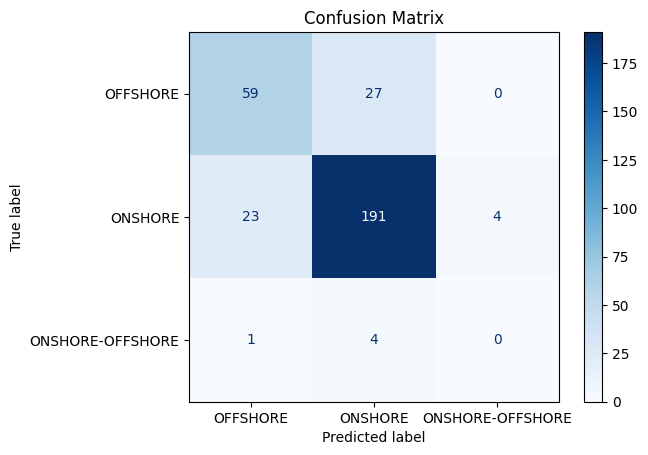

                  precision    recall  f1-score   support

        OFFSHORE       0.71      0.69      0.70        86
         ONSHORE       0.86      0.88      0.87       218
ONSHORE-OFFSHORE       0.00      0.00      0.00         5

        accuracy                           0.81       309
       macro avg       0.52      0.52      0.52       309
    weighted avg       0.80      0.81      0.81       309



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Выделяем признаки (X) и целевую переменную (y)
X = df_encoded.drop(columns=['Onshore/Offshore'])
y = df_encoded['Onshore/Offshore']

# Создаем модель дерева решений
model = DecisionTreeClassifier(random_state=42)

# Используем K-Fold кросс-валидацию (5 фолдов)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Хранение метрик
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Вставляем target_mapping
target_encoder = label_encoders['Onshore/Offshore']  # Получаем энкодер для целевой переменной
target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))

# Хранение предсказанных и истинных значений для всех фолдов
y_pred_all = []
y_test_all = []

# Выполняем кросс-валидацию вручную
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Собираем все предсказания и истинные значения
    y_pred_all.extend(y_pred)
    y_test_all.extend(y_test)

    # Вычисляем метрики
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Собираем матрицы ошибок для всех фолдов
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=model.classes_))

# Выводим средние метрики
print('Без балансировки классов')
print(f'Accuracy: {np.mean(accuracy_scores):.4f}')
print(f'Precision: {np.mean(precision_scores):.4f}')
print(f'Recall: {np.mean(recall_scores):.4f}')
print(f'F1-score: {np.mean(f1_scores):.4f}')

# Суммируем матрицы ошибок по всем фолдам
conf_matrix = np.sum(conf_matrices, axis=0)

# Отображаем итоговую матрицу ошибок с названиями из target_mapping
disp_labels = []
for label in model.classes_:
    # Для каждой метки из model.classes_ ищем соответствие в target_mapping
    for key, value in target_mapping.items():
        if value == label:
            disp_labels.append(key)
            break

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=disp_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Преобразуем предсказания и истинные значения в строковые метки
y_pred_str_all = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_pred_all]
y_test_str_all = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_test_all]

# Выводим отчет о классификации
print(classification_report(y_test_str_all, y_pred_str_all, target_names=list(target_mapping.keys())))


In [ ]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE

# Выделяем признаки (X) и целевую переменную (y)
X = df_encoded.drop(columns=['Onshore/Offshore'])
y = df_encoded['Onshore/Offshore']

# Проверим распределение классов до применения SMOTE
print("До SMOTE:")
print(y.value_counts())

# Устанавливаем пропорции для sampling_strategy
sampling_strategy = {0: 218, 1: 218, 2: 218}  # Все классы увеличиваем до 218 примеров

# Применяем SMOTE для балансировки классов с заданным sampling_strategy
smote = SMOTE(random_state=42, k_neighbors=2, sampling_strategy=sampling_strategy)  # Уменьшаем k_neighbors, если нужно
X_resampled, y_resampled = smote.fit_resample(X, y)

# Проверим распределение классов после применения SMOTE
print("\nПосле SMOTE:")
print(y_resampled.value_counts())


До SMOTE:
Onshore/Offshore
1    218
0     86
2      5
Name: count, dtype: int64

После SMOTE:
Onshore/Offshore
1    218
0    218
2    218
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Разделение на признаки (X) и целевую переменную (y)
X = X_resampled
y = y_resampled

# Создание и обучение модели дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Оценка важности признаков
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print('Значимость признаков')
print(feature_importance_df)


Значимость признаков
                           Feature  Importance
7                        Longitude    0.237662
15    Thickness (gross average ft)    0.224953
5                  Tectonic regime    0.191614
12                           Depth    0.139276
6                         Latitude    0.050262
16  Thickness (net pay average ft)    0.045713
10                Reservoir status    0.029574
1                   Reservoir unit    0.021436
19                 Thickness_ratio    0.012822
18                    Permeability    0.012273
13                Reservoir period    0.011674
8                 Operator company    0.011659
11              Structural setting    0.007004
20                       Continent    0.004077
3                           Region    0.000000
2                          Country    0.000000
0                       Field name    0.000000
4                       Basin name    0.000000
9                 Hydrocarbon type    0.000000
14                       Lithology    0

Вывод:
- после балансировки классом по алгоритму SMOTE значимость признаков несколько поменялись:

- значение географических переменных уменьшилось

- значение технических переменных увеличилось
- введенная новая переменная Continent в данном случае оказалась значимой (1,3%)

Возможно что значимость признаком для сбалансированных класов более точно отвечает поставленной задаче предсказания offshore/onshore

- без кросс валидации

Accuracy: 0.8782
Precision: 0.8781
Recall: 0.8782
F1-score: 0.8767


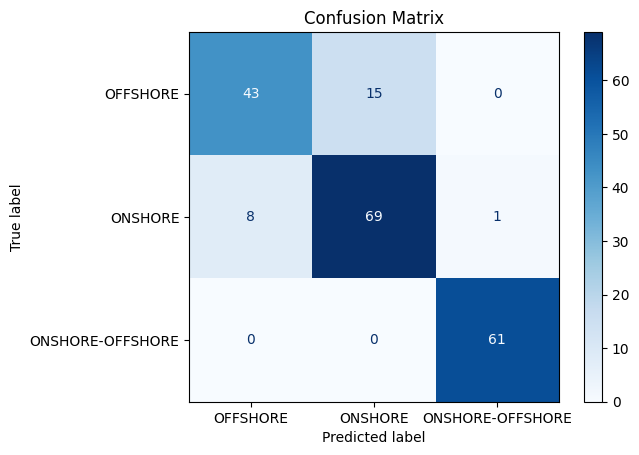

                  precision    recall  f1-score   support

        OFFSHORE       0.84      0.74      0.79        58
         ONSHORE       0.82      0.88      0.85        78
ONSHORE-OFFSHORE       0.98      1.00      0.99        61

        accuracy                           0.88       197
       macro avg       0.88      0.88      0.88       197
    weighted avg       0.88      0.88      0.88       197



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
import numpy as np
import matplotlib.pyplot as plt

# Выделяем признаки (X) и целевую переменную (y)
X = X_resampled
y = y_resampled

# Разделяем данные на обучающую и тестовую выборки (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создаем модель дерева решений
model = DecisionTreeClassifier(random_state=42)

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

# Получаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Выводим метрики
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Генерируем и отображаем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Получаем метки классов для отображения
target_encoder = label_encoders['Onshore/Offshore']
target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))

disp_labels = [key for key, value in target_mapping.items() if value in model.classes_]

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=disp_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Преобразуем предсказания и истинные значения в строковые метки
y_pred_str = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_pred]
y_test_str = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_test]

# Выводим отчет о классификации
print(classification_report(y_test_str, y_pred_str, target_names=list(target_mapping.keys())))


- с кросс валидацией

баланс классов {0: 218, 1: 218, 2: 218}
Accuracy: 0.9006
Precision: 0.9036
Recall: 0.9006
F1-score: 0.9006


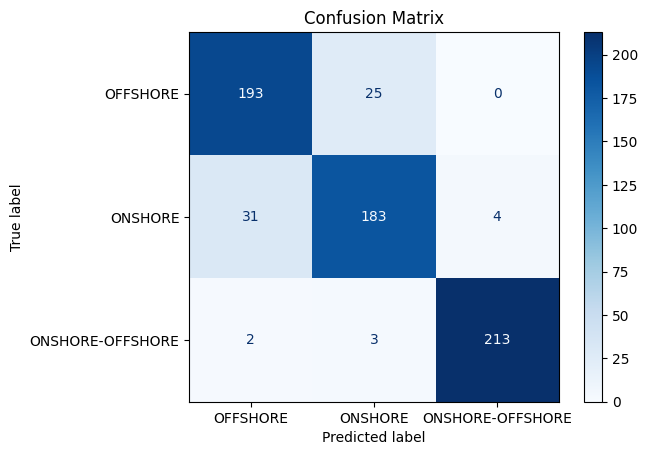

                  precision    recall  f1-score   support

        OFFSHORE       0.85      0.89      0.87       218
         ONSHORE       0.87      0.84      0.85       218
ONSHORE-OFFSHORE       0.98      0.98      0.98       218

        accuracy                           0.90       654
       macro avg       0.90      0.90      0.90       654
    weighted avg       0.90      0.90      0.90       654



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Выделяем признаки (X) и целевую переменную (y)
X = X_resampled
y = y_resampled


# Создаем модель дерева решений
model = DecisionTreeClassifier(random_state=42)

# Используем K-Fold кросс-валидацию (5 фолдов)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Хранение метрик
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Вставляем target_mapping
target_encoder = label_encoders['Onshore/Offshore']  # Получаем энкодер для целевой переменной
target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))

# Хранение предсказанных и истинных значений для всех фолдов
y_pred_all = []
y_test_all = []

# Выполняем кросс-валидацию вручную
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Собираем все предсказания и истинные значения
    y_pred_all.extend(y_pred)
    y_test_all.extend(y_test)

    # Вычисляем метрики
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Собираем матрицы ошибок для всех фолдов
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=model.classes_))

# Выводим средние метрики
print(f'баланс классов {sampling_strategy}')
print(f'Accuracy: {np.mean(accuracy_scores):.4f}')
print(f'Precision: {np.mean(precision_scores):.4f}')
print(f'Recall: {np.mean(recall_scores):.4f}')
print(f'F1-score: {np.mean(f1_scores):.4f}')

# Суммируем матрицы ошибок по всем фолдам
conf_matrix = np.sum(conf_matrices, axis=0)

# Отображаем итоговую матрицу ошибок с названиями из target_mapping
disp_labels = []
for label in model.classes_:
    # Для каждой метки из model.classes_ ищем соответствие в target_mapping
    for key, value in target_mapping.items():
        if value == label:
            disp_labels.append(key)
            break

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=disp_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Преобразуем предсказания и истинные значения в строковые метки
y_pred_str_all = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_pred_all]
y_test_str_all = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_test_all]

# Выводим отчет о классификации
print(classification_report(y_test_str_all, y_pred_str_all, target_names=list(target_mapping.keys())))


Вывод:

- модель с балансом классов 218/218/218 в целов лучше предсказывает чем модель с балансом 200/218/175
- но модель с балансом 200/218/175 немного лучше предсказывает ONSHORE (меньше ошибок с ONSHORE-OFFSHORE).  

# 7. Предсказание на тестовой выборке

In [ ]:
# Найдем уникальные колонки в каждом датафрейме
unique_in_df = df.columns.difference(df_test.columns)
unique_in_df_test = df_test.columns.difference(df.columns)

# Выведем их
print("Уникальные колонки в  train датасете:", unique_in_df)
print("Уникальные колонки во test датасете:", unique_in_df_test)


Уникальные колонки в  train датасете: Index(['Onshore/Offshore'], dtype='object')
Уникальные колонки во test датасете: Index([], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import HashingVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy={0: 218, 1: 218, 2: 218}, random_state=42)

# 1. Загрузка данных (df и df_test уже загружены)

# Определение признаков
target_col = 'Onshore/Offshore'
hashing_cols = ['Field name', 'Reservoir unit']
categorical_cols = list(df.select_dtypes(include=['object']).columns)

# Безопасное удаление целевой переменной из категориальных признаков
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

categorical_cols = [col for col in categorical_cols if col not in hashing_cols]  # Исключаем хешируемые

# 2. Label Encoding для целевой переменной (только в df)
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])

# Проверяем, есть ли целевой столбец в df_test
if target_col in df_test.columns:
    df_test[target_col] = label_encoder.transform(df_test[target_col])  # Применяем ту же трансформацию

# 3. One-Hot Encoding для категориальных признаков
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
one_hot_encoded_train = one_hot_encoder.fit_transform(df[categorical_cols])
one_hot_encoded_test = one_hot_encoder.transform(df_test[categorical_cols])

# Создание датафреймов из One-Hot Encoding
one_hot_columns = one_hot_encoder.get_feature_names_out(categorical_cols)
df_one_hot = pd.DataFrame(one_hot_encoded_train, columns=one_hot_columns)
df_test_one_hot = pd.DataFrame(one_hot_encoded_test, columns=one_hot_columns)

# 4. HashingVectorizer для 'Field name' и 'Reservoir unit'
hash_vectorizer = HashingVectorizer(n_features=10, norm= None, alternate_sign=False)

for col in hashing_cols:
    df_hash = pd.DataFrame(hash_vectorizer.fit_transform(df[col].astype(str)).toarray())
    df_test_hash = pd.DataFrame(hash_vectorizer.transform(df_test[col].astype(str)).toarray())

    # Переименовываем колонки, чтобы избежать конфликтов
    df_hash.columns = [f"{col}_hash_{i}" for i in range(df_hash.shape[1])]
    df_test_hash.columns = [f"{col}_hash_{i}" for i in range(df_test_hash.shape[1])]

    # Добавляем в основной датафрейм
    df = pd.concat([df, df_hash], axis=1)
    df_test = pd.concat([df_test, df_test_hash], axis=1)

# 5. Нормализация числовых данных
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Убедимся, что числовые столбцы присутствуют в df_test и применим нормализацию только для этих столбцов
numeric_cols_in_both = [col for col in numeric_cols if col in df_test.columns]

if numeric_cols_in_both:
    scaler = StandardScaler()
    df[numeric_cols_in_both] = scaler.fit_transform(df[numeric_cols_in_both])
    df_test[numeric_cols_in_both] = scaler.transform(df_test[numeric_cols_in_both])

# 6. Объединение всех данных и переименование итоговых датафреймов
df_resampled = pd.concat([df, df_one_hot], axis=1).drop(columns=categorical_cols + hashing_cols)
df_test_resampled = pd.concat([df_test, df_test_one_hot], axis=1).drop(columns=categorical_cols + hashing_cols)

# 7. Балансировка классов с помощью SMOTE (Только для обучающего датасета)
sampling_strategy = {0: 170, 1: 218, 2: 90}  # Все классы увеличиваем до 218 примеров

#smote = SMOTE(random_state=42, k_neighbors=2, sampling_strategy=sampling_strategy)
adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=42, n_neighbors=2)
# Отделяем целевой признак перед SMOTE
X_resampled, y_resampled = adasyn.fit_resample(df_resampled.drop(columns=[target_col]), df_resampled[target_col])

# Создаем итоговый DataFrame после балансировки
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=df_resampled.drop(columns=[target_col]).columns),
                          pd.DataFrame(y_resampled, columns=[target_col])], axis=1)

# Вывод информации о готовых датафреймах
print("Train set shape (after SMOTE):", df_resampled.shape)
print("Test set shape:", df_test_resampled.shape)


Train set shape (after SMOTE): (467, 420)
Test set shape: (133, 419)


In [ ]:
# Проверка на NaN в обучающем датасете
nan_train = df_resampled.isna().sum().sum()
print(f"Количество NaN в df_resampled: {nan_train}")

# Проверка на NaN в тестовом датасете
nan_test = df_test_resampled.isna().sum().sum()
print(f"Количество NaN в df_test_resampled: {nan_test}")

# Если нужно вывести, в каких колонках есть NaN
if nan_train > 0:
    print("\nКолонки с NaN в df_resampled:")
    print(df_resampled.isna().sum()[df_resampled.isna().sum() > 0])

if nan_test > 0:
    print("\nКолонки с NaN в df_test_resampled:")
    print(df_test_resampled.isna().sum()[df_test_resampled.isna().sum() > 0])


Количество NaN в df_resampled: 0
Количество NaN в df_test_resampled: 26

Колонки с NaN в df_test_resampled:
Latitude     13
Longitude    13
dtype: int64


In [ ]:
# Вычисляем априорные вероятности классов
class_prior = y.value_counts(normalize=True).sort_index().tolist()

# Выводим значения априорных вероятностей
print("Априорные вероятности классов:")
print(class_prior)

Априорные вероятности классов:
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


In [ ]:
import numpy as np
import pandas as pd
import pickle  # Для сохранения модели
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report

# 1. Разделение данных
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 2. Выбор модели и параметров
best_params = {'var_smoothing': 1e-09}  # Лучшие параметры для GaussianNB
# Вычисляем априорные вероятности классов
class_prior = y.value_counts(normalize=True).sort_index().tolist()
# Создаем модель с корректными priors
model = GaussianNB(var_smoothing=best_params['var_smoothing'], priors=class_prior)

# 3. Обучение модели на всех данных
model.fit(X, y)

# 4. Прогнозирование на тех же данных (если требуется, иначе можно использовать X_test)
y_pred = model.predict(X)

# 5. Вывод отчета по классификации
print("Лучшие параметры:", best_params)
print("\nClassification Report:")
print(classification_report(y, y_pred))

# 6. Сохранение модели в файл
model_filename = "naive_bayes_best_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"\nМодель сохранена в {model_filename}")


Лучшие параметры: {'var_smoothing': 1e-09}

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       159
           1       1.00      0.96      0.98       218
           2       1.00      1.00      1.00        90

    accuracy                           0.98       467
   macro avg       0.98      0.99      0.99       467
weighted avg       0.98      0.98      0.98       467


Модель сохранена в naive_bayes_best_model.pkl


In [ ]:
pip install tpot

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 67.9 MB/s eta

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# 1. Разделение данных
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 2. Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# 3. Инициализируем TPOT (убираем verbosity)
tpot = TPOTClassifier(generations=5, population_size=20, random_state=42)

# 4. Обучаем TPOT
tpot.fit(X_train, y_train)

# 5. Выводим лучшую найденную модель
best_model = tpot.fitted_pipeline_

print("\n🏆 Лучшая модель от TPOT:")
print(best_model)

# 6. Оцениваем точность на тестовых данных
accuracy = tpot.score(X_test, y_test)
print(f"\n🔍 Accuracy на тесте: {accuracy:.4f}")

# 7. Экспортируем код для лучшей модели
tpot.export("best_model.py")


/usr/local/lib/python3.11/dist-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36603
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39059'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:36757 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36757
INFO:distributed.core:Starting established connection to tcp://127.0.0.1

KeyboardInterrupt: 

In [ ]:
from tune_sklearn import TuneSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Используем твои данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определяем диапазон параметров для подбора
param_distributions = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10]
}

# Подбираем лучшие параметры
tune_search = TuneSearchCV(
    RandomForestClassifier(),
    param_distributions=param_distributions,
    n_trials=10,  # Количество итераций поиска
    scoring="accuracy",
    random_state=42
)

# Обучаем
tune_search.fit(X_train, y_train)

# Выводим лучшую модель и параметры
best_model = tune_search.best_estimator_
best_params = tune_search.best_params_

print("\n🏆 Лучшая модель от Tune-sklearn:")
print(best_model)

print("\n⚙️ Оптимальные параметры:")
print(best_params)

# Оцениваем точность
accuracy = best_model.score(X_test, y_test)
print(f"\n🔍 Accuracy на тесте: {accuracy:.4f}")


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import pickle

# 1. Разделение данных
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 2. Создание модели градиентного бустинга
model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, subsample=1, random_state=42)


# 3. Обучение модели
model.fit(X, y)

# 4. Прогнозирование на тех же данных (можно использовать X_test, если есть)
y_pred = model.predict(X)

# 5. Оценка модели
print("Classification Report:")
print(classification_report(y, y_pred))

# 6. Сохранение модели
model_filename = "gradient_boosting_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"\nМодель сохранена в {model_filename}")


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pickle

# 1. Разделение данных
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 2. Создание модели XGBoost
model = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, subsample=1, random_state=42, use_label_encoder=False, eval_metric='logloss')
#model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, subsample=1, colsample_bytree=1, random_state=42)

#'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1

# 3. Обучение модели
model.fit(X, y)

# 4. Прогнозирование на тех же данных (можно использовать X_test, если есть)
y_pred = model.predict(X)

# 5. Оценка модели
print("Classification Report:")
print(classification_report(y, y_pred))

# 6. Сохранение модели
model_filename = "xgboost_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"\nМодель сохранена в {model_filename}")


In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
import pickle

# 1. Разделение данных
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 1. Создание модели CatBoost
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=50
)

# 2. Обучение модели на всех данных
model.fit(X, y)

# 3. Сохранение модели
model_filename = "catboost_model.cbm"
model.save_model(model_filename)

print(f"\nМодель сохранена в {model_filename}")


In [ ]:
# Проверим, есть ли пустые значения в df_test_resampled
missing_values = df_test_resampled.isna().sum()

# Выведем столбцы с пропущенными значениями и их количество
missing_values[missing_values > 0]


In [ ]:
df_test_resampled.columns.tolist()

In [ ]:
import numpy as np
import pandas as pd

# Предположим, что df_test_resampled уже загружен
# Переводим "unknown" в NaN для удобства
df_test_resampled.replace({"unknown": np.nan}, inplace=True)

# Столбцы для хешированных значений
hash_columns = [f'Field name_hash_{i}' for i in range(10)]

# Шаг 1: Определяем строки, где Latitude или Longitude равны NaN
rows_with_missing_coords = df_test_resampled[df_test_resampled['Latitude'].isna() | df_test_resampled['Longitude'].isna()]

# Список обновленных строк
updated_rows = []

# Шаг 2: Для каждой строки с пропущенными координатами ищем медиану по строкам с таким же значением в хешированных столбцах
for index, row in rows_with_missing_coords.iterrows():
    # Получаем хешированные значения для текущей строки
    hash_values = row[hash_columns].values

    # Фильтруем строки с такими же хешированными значениями
    matching_rows = df_test_resampled[(df_test_resampled[hash_columns] == hash_values).all(axis=1)]

    # Если есть строки для замены
    if not matching_rows.empty:
        # Находим медиану для Latitude и Longitude
        median_lat = matching_rows['Latitude'].median(skipna=True)
        median_lon = matching_rows['Longitude'].median(skipna=True)

        # Если медианные значения найдены, заменяем
        if not np.isnan(median_lat) and not np.isnan(median_lon):
            df_test_resampled.at[index, 'Latitude'] = median_lat
            df_test_resampled.at[index, 'Longitude'] = median_lon
            updated_rows.append(index)

# Выводим обновленные строки
print("Обновленные строки (индексы):", updated_rows)

# Проверяем, остались ли строки с NaN в Latitude и Longitude после обновлений
remaining_unknowns = df_test_resampled[df_test_resampled['Latitude'].isna() | df_test_resampled['Longitude'].isna()]
print("Остались строки с неизвестными координатами?", not remaining_unknowns.empty)

# Индексы строк с неизвестными координатами после всех замен
remaining_unknowns_indices = remaining_unknowns.index.tolist()
print("Индексы строк с неизвестными координатами после всех замен:")
print(remaining_unknowns_indices)


In [ ]:
import pickle
import pandas as pd

# Загружаем модель
with open("xgboost_model.pkl", "rb") as f:
    model = pickle.load(f)
#model = CatBoostClassifier()
#model.load_model("catboost_model.cbm")  # Используем правильный метод

# Сохраняем оригинальные индексы перед обработкой
df_test_resampled['original_index'] = df_test_resampled.index

# Убираем целевую переменную и возможные лишние колонки перед предсказанием
X_test = df_test_resampled.drop(columns=['Onshore/Offshore', 'original_index'], errors='ignore')

# Проверяем пропущенные значения
if X_test.isna().sum().sum() > 0:
    print("Внимание! Найдены пропущенные значения в X_test, заполняем их.")

    # Заполняем NaN медианой (можно заменить на другое значение)
    X_test.fillna(X_test.median(), inplace=True)

# Получаем предсказания
y_pred_test = model.predict(X_test)

# Добавляем предсказания в df_test_resampled
df_test_resampled['Onshore/Offshore'] = y_pred_test

# Создаем DataFrame для submission
submission = df_test_resampled[['original_index', 'Onshore/Offshore']]

# Сохраняем в CSV
submission.to_csv("submission.csv", sep=",", index=False)

print("\nФайл 'submission.csv' успешно сохранен.")


In [ ]:
print(submission.isna().sum())

In [ ]:
df_test = pd.read_csv(r"/content/drive/MyDrive/ML_DZ3/oil_test.csv")

In [ ]:
# Предполагаем, что данные в df_test содержат оригинальные значения 'Latitude' и 'Longitude'
df_test_resampled['Latitude'] = df_test['Latitude']
df_test_resampled['Longitude'] = df_test['Longitude']

# Теперь df_test_resampled содержит оригинальные значения 'Latitude' и 'Longitude'


In [ ]:
df_test[['Latitude', 'Longitude']]

In [ ]:
import folium

# Создаем карту мира с центральной точкой (например, координаты (0, 0) - экватор и нулевой меридиан)
map_world = folium.Map(location=[0, 0], zoom_start=2)

# Фильтруем строки, где есть NaN в столбцах Latitude или Longitude
df_filtered = df_test_resampled[['Onshore/Offshore', 'Latitude', 'Longitude']].dropna(subset=['Latitude', 'Longitude'])

# Перебираем строки в отфильтрованном DataFrame и добавляем метки с соответствующими цветами
for index, row in df_filtered.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    onshore_offshore = row['Onshore/Offshore']

    # Устанавливаем цвет метки в зависимости от значения Onshore/Offshore
    if onshore_offshore == 0:
        color = 'red'
    elif onshore_offshore == 1:
        color = 'blue'
    elif onshore_offshore == 2:
        color = 'green'
    else:
        color = 'gray'  # Если значение не 0, 1 или 2, то серый цвет

    # Добавляем метку с номером строки
    folium.CircleMarker(location=[latitude, longitude], radius=5, color=color, fill=True, fill_color=color).add_to(map_world)
    folium.Marker([latitude, longitude], popup=f"Row: {index}").add_to(map_world)

# Отображаем карту
map_world
